## Name - ARNAB RAY CHAUDHURI
## The Sparks Foundation (Data Science and Business Analytics Internship)
## Problem Statement - Predict the score of an student based on the no. of study hours
## Task - 1
### ML Algorithm - Linear Regression
### Predict - What will be predicted score if a student studies for 9.25 hrs/ day?

In [ ]:
#imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("C://Users//Arnab//Desktop//TSF GRIP//Task 1 score prediction//student_scores.csv")

In [ ]:
df.head() ## data frame

## Distribution of exam scores

In [ ]:
sns.distplot(df.Scores)

## Distribution of hours studied

In [ ]:
sns.distplot(df.Hours)

#### Exam scores follow a bimodal distribution, there are two peaks
#### That means that there are two seperate groups of student, one group under prepared for the exam and another group over prepared

## Finding correlation between number of Hours studied and Score of students

In [ ]:
#Visualising the data using heatmap
plt.figure()
sns.heatmap(df.corr(),cmap='RdBu',annot=True)
plt.show()

## Assigning linear model to the data

In [ ]:
## reshape(-1,1) changes it to a 'n' dimentional array with 1 element in each dimention.
## -1 represents unknon n dimention,as there are n elements in the original array
x = df.iloc[:,0].values.reshape(-1,1) ## independent variable
y = df.iloc[:,1] ## dependent variable

In [ ]:
#Import LinearRegression and split the data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [ ]:
#Fit the model over the training dataset
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model_train = model.fit(X_train,y_train)

In [ ]:
pred_test = model_train.predict(X_test)
pred_test

In [ ]:
pd.DataFrame({'Actual': y_test, 'Predicted': pred_test}).sort_index()

In [12]:
model_train.score(X_test,y_test)

0.9678055545167994

 #### The R^2 is 0.967 or approx 97%. So 97% changes in SCORE is due to change in number of HOURS studied

## Visualization

#### We add a touch of aesthetics by coloring the original observations(Traing data) in red and the regression line in green

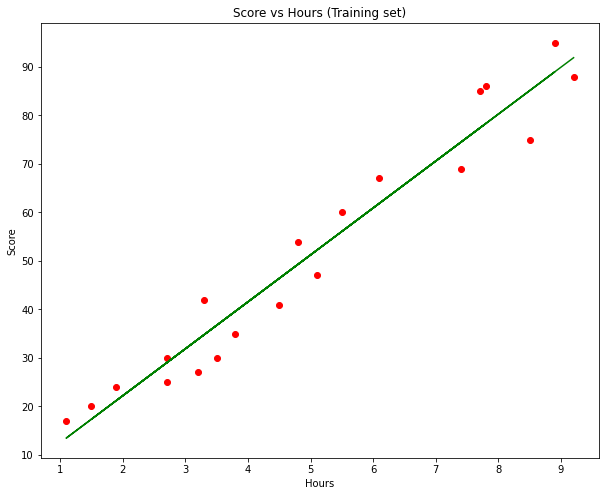

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, model_train.predict(X_train), color = "green")
plt.title("Score vs Hours (Training set)")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

#### We add a touch of aesthetics by coloring the original observations(Testing data) in blue and the regression line in green

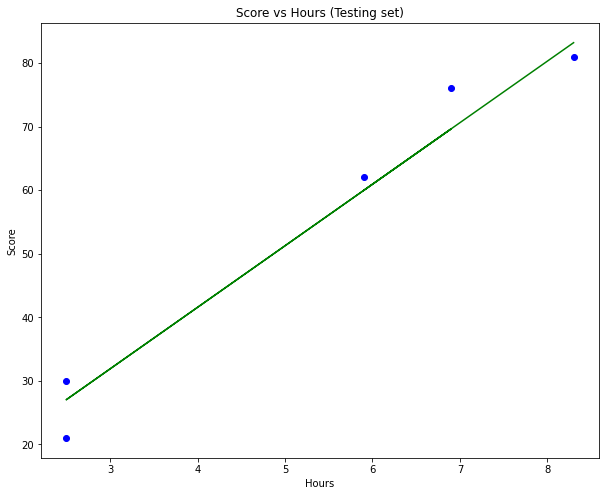

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(X_test, y_test, color = "blue")
plt.plot(X_test, model_train.predict(X_test), color = "green")
plt.title("Score vs Hours (Testing set)")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

# Model Evaluation

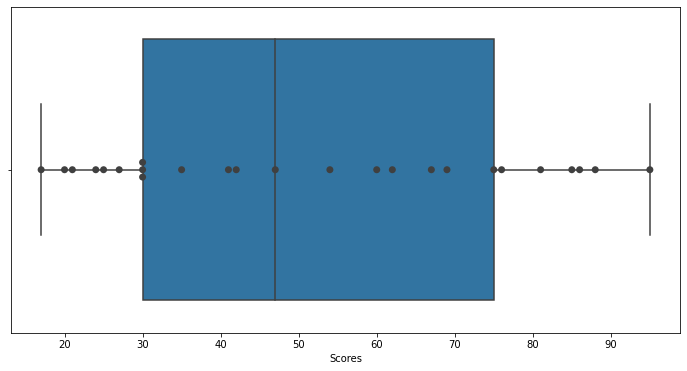

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(df.Scores)
sns.swarmplot(df.Scores,color='0.25',size=7)
plt.show()

#### There are no outliers in the data point, score

In [16]:
import sklearn.metrics as metrics

In [17]:
#Model Evaluation using Mean Square Error (MSE)
mse = metrics.mean_squared_error(y_test, model_train.predict(X_test))
print('Mean Squared Error:', mse)

Mean Squared Error: 18.943211722315272


In [18]:
#Model Evaluation using Root Mean Square Error (RMSE)
rmse = np.sqrt(metrics.mean_squared_error(y_test, model_train.predict(X_test)))
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 4.352380006653288


In [19]:
#Model Evaluation using Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, model_train.predict(X_test))
print('Mean Absolute Error:', mae)

Mean Absolute Error: 3.9207511902099244


## Prediction

In [20]:
x1 = [[9.25]]
y1 = model_train.predict(x1) ## Predicted score for studying 9.25 hours
pred_score = y1[0]
pred_score

92.38611528261494

In [21]:
print ("So the predicted score of a student studing 9.25 hours is", pred_score)

So the predicted score of a student studing 9.25 hours is 92.38611528261494


In [22]:
print("Prediction interval is" ,(pred_score-2*rmse), "to", (pred_score+2*rmse),"for 95% accurate prediction")

Prediction interval is 83.68135526930837 to 101.0908752959215 for 95% accurate prediction


#### So the predicted score of a student studing 9.25 hours is 92.38611528261494
####  Prediction interval is 83.68135526930837 to 100 for 95% accurate prediction